In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn import cluster
from sklearn import mixture
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# 데이터 생성

In [7]:
def plot_data(dataset, position, title):
    X,y = dataset
    plt.subplot(position)
    plt.title(title)
    plt.scatter(X[:,0], X[:,1])

In [8]:
np.random.seed(0)
n_samples =1500
random_state = 0
noise = 0.05

In [9]:
circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=noise, random_state = random_state)
moons = datasets.make_moons(n_samples=n_samples, noise=noise, random_state = random_state)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
no_structures = np.random.rand(n_samples,2), None

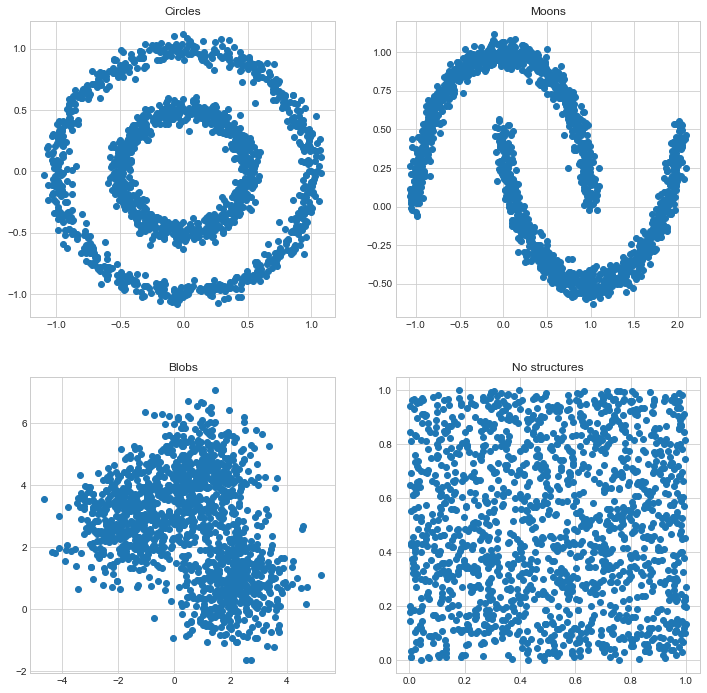

In [10]:
plt.figure(figsize=(12,12))
plot_data(circles, 221, 'Circles')
plot_data(moons, 222, 'Moons')
plot_data(blobs, 223, 'Blobs')
plot_data(no_structures, 224, 'No structures')

In [43]:
def fit_predict_plot(model, dataset, position, title):
    X, y = dataset
    model.fit(X)
    if hasattr(model, 'labels_'):
        labels = model.labels_.astype(np.int)
    else:
        labels = model.predict(X)

    colors = np.array(['#30A9DE', '#E53A40', '#090707', '#A593E0', '#F6B352', '#519D9E', '#D81159', '#8CD790', '353866']) #시각화에서 중요함. 클러스터가 잘 보이게
    ax = plt.subplot(position)
    ax.set_title(title)
    ax.scatter(X[:,0], X[:,1], color = colors[labels])

# K - 평균
- 대표적인 클러스터링 알고리즘
- N 개의 등분산 그룹으로 군집화
- K 가 사용자가 주는 하이퍼 파라미터 = 군집화 개수
- 클러스터에서 중심점(평균) = 센트로이드
- 같은 군집은 뭉쳐있고, 각 군집끼리는 떨어져 있어야 함.

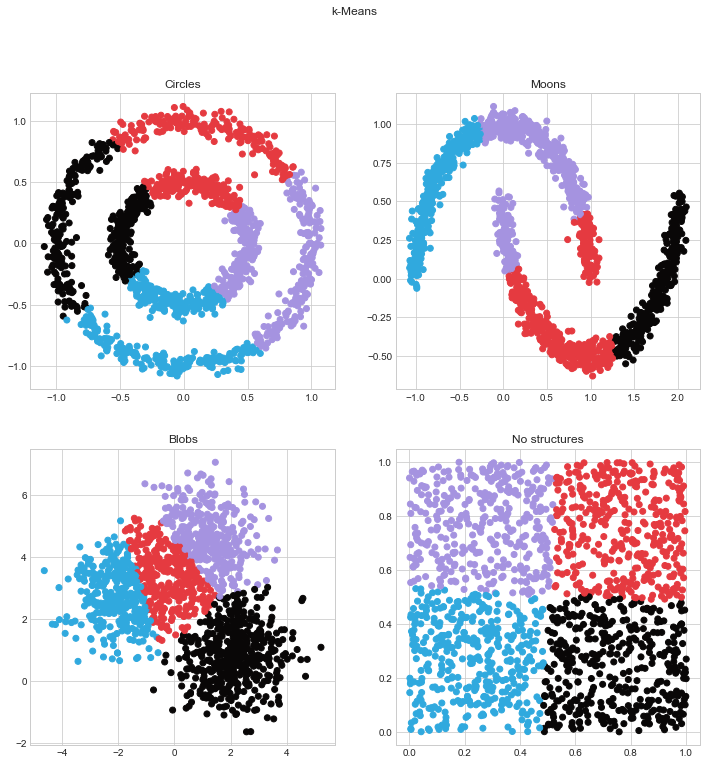

In [19]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('k-Means')

fit_predict_plot(cluster.KMeans(n_clusters = 4, random_state=random_state),circles, 221, 'Circles') #k 값이 2이므로 데이터에서 클러스터를 2개 찾아야 함.
fit_predict_plot(cluster.KMeans(n_clusters = 4, random_state=random_state),moons, 222, 'Moons')
fit_predict_plot(cluster.KMeans(n_clusters = 4, random_state=random_state),blobs, 223, 'Blobs')
fit_predict_plot(cluster.KMeans(n_clusters = 4, random_state=random_state),no_structures, 224, 'No structures')

#### 결과를 보면, k means 가 대표적인 알고리즘이지만, 거리로 계산하므로 위와 같이 나온다.
#### 그럼 우리가 추가적으로 클러스터 개수를 늘려보자. 2 ==> 3

# 붓꽃 데이터 군집화

In [20]:
from sklearn.datasets import load_iris

In [21]:
iris = load_iris()

In [22]:
model = cluster.KMeans(n_clusters=3) #아이리스 개수 3
model.fit(iris.data) # 아이리스 데이터 학습하기
predict = model.predict(iris.data)

In [28]:
idx = np.where(predict==0)
print(iris.target[idx])

[1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


In [29]:
idx = np.where(predict ==1)
print(iris.target[idx])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [31]:
idx = np.where(predict ==2)
print(iris.target[idx])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


# 미니 배치 k mean
#### 배치 처리를 통해 계산 시간을 줄인 k 평균
#### k 평균과 다른 결과가 나올 수 있다.

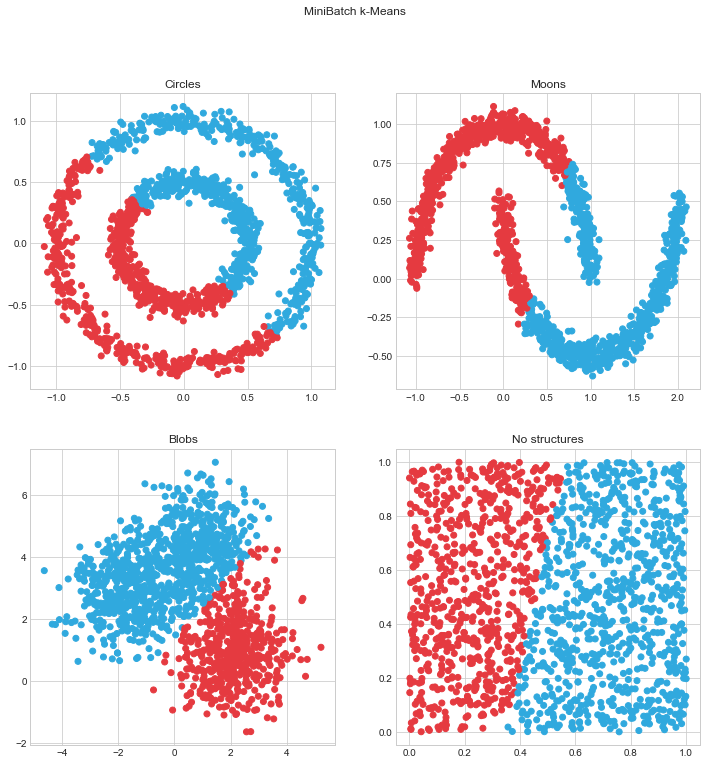

In [37]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('MiniBatch k-Means')

fit_predict_plot(cluster.MiniBatchKMeans(n_clusters = 2, random_state=random_state),circles, 221, 'Circles') #k 값이 2이므로 데이터에서 클러스터를 2개 찾아야 함.
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters = 2, random_state=random_state),moons, 222, 'Moons')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters = 2, random_state=random_state),blobs, 223, 'Blobs')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters = 2, random_state=random_state),no_structures, 224, 'No structures')

- 미니 배치 성격을 도입했음. 결과에 큰 차이가 나진 않았지만, 배치 처리를 통해서 시간을 줄일 수 있도록 할 수 있음. 그리고 k 평균과 조금 다른 결과가 나올 수 있음.

# Affinity Propagation
#### 샘플을 찾을 때까지 여러번 반복
#### 샘플 쌍 끼리 메세지를 보내 군집을 생성
#### 군집의 중심을 정함 => 군집의 갯수를 자동으로 정함 (k 평균 처럼 우리가 정하지 않음)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\cluster\_affinity_propagation.py:154: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\cluster\_affinity_propagation.py:154: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\cluster\_affinity_propagation.py:154: FutureWarning: 'random_state' has been introduced in 0

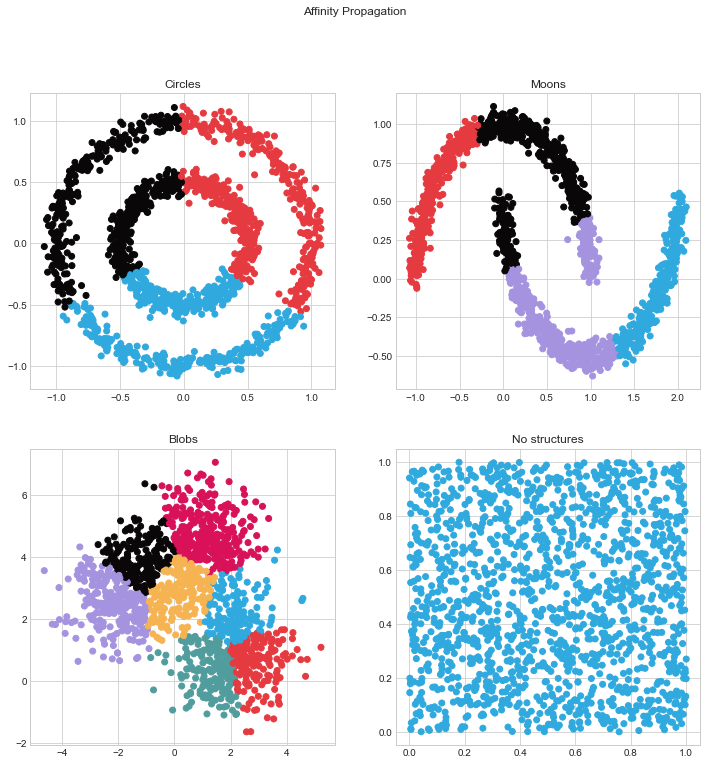

In [38]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Affinity Propagation')

fit_predict_plot(cluster.AffinityPropagation(damping = 0.9, preference=-200),circles, 221, 'Circles') #k 값이 2이므로 데이터에서 클러스터를 2개 찾아야 함.
fit_predict_plot(cluster.AffinityPropagation(damping = 0.9, preference=-200),moons, 222, 'Moons')
fit_predict_plot(cluster.AffinityPropagation(damping = 0.9, preference=-200),blobs, 223, 'Blobs')
fit_predict_plot(cluster.AffinityPropagation(damping = 0.9, preference=-200),no_structures, 224, 'No structures')

- 원은 3개, 반달은 4개, 마지막 거는 군집화 특성이 없다고 결론 지어졌음.

# Mean Shift
#### 중심점 후보를 정해진 구역 내 평균으로 업데이트

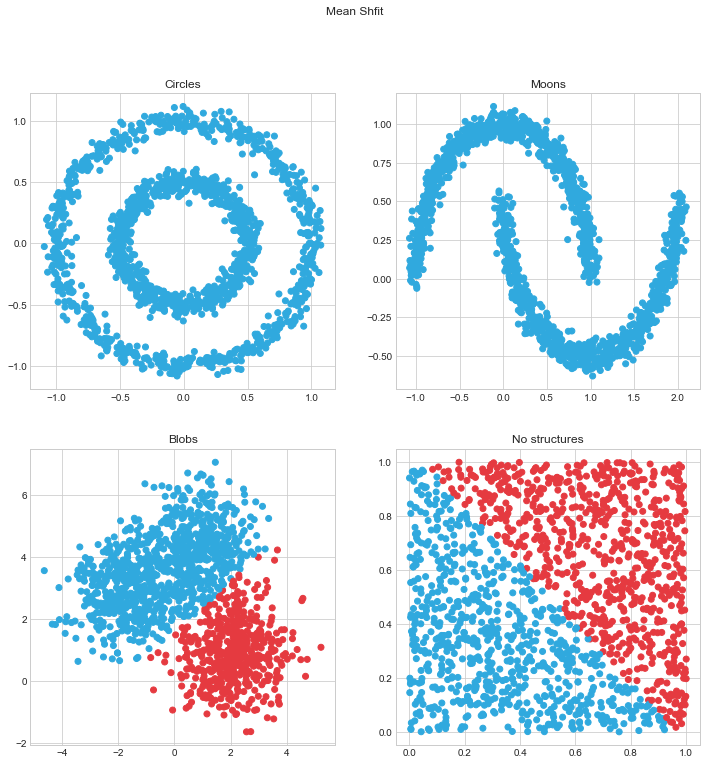

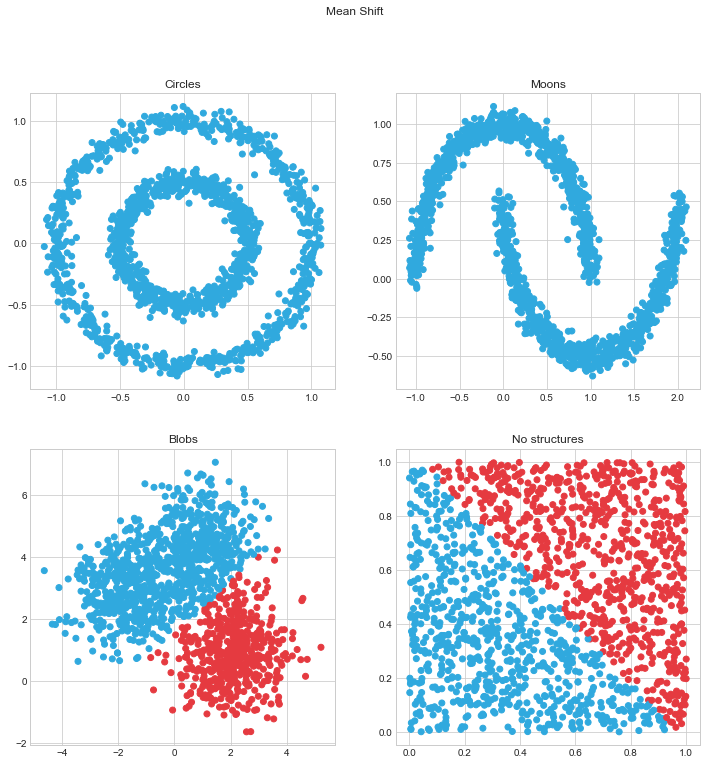

In [41]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Mean Shift')

fit_predict_plot(cluster.MeanShift(),circles, 221, 'Circles') #k 값이 2이므로 데이터에서 클러스터를 2개 찾아야 함.
fit_predict_plot(cluster.MeanShift(),moons, 222, 'Moons')
fit_predict_plot(cluster.MeanShift(),blobs, 223, 'Blobs')
fit_predict_plot(cluster.MeanShift(),no_structures, 224, 'No structures')

# 스펙트럼 군집화

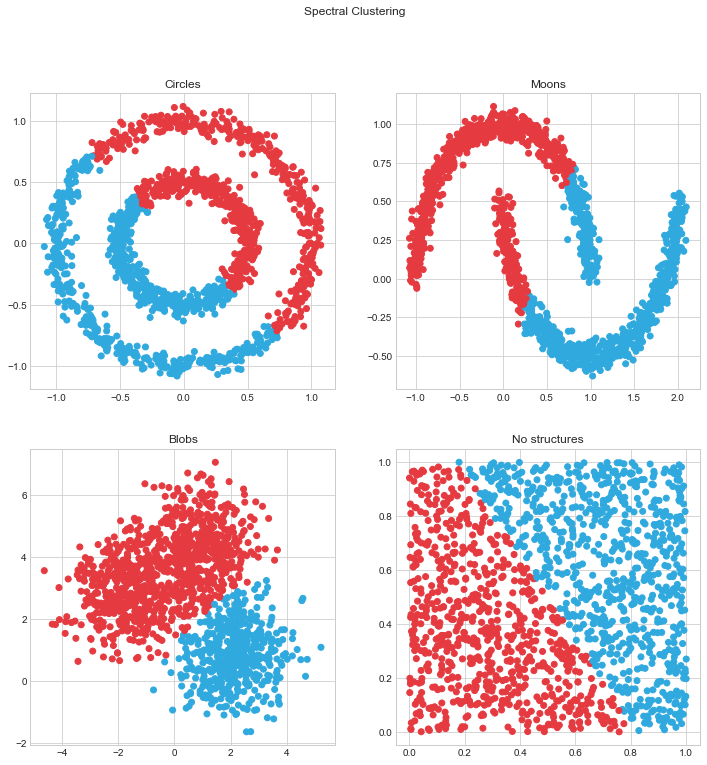

In [44]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Spectral Clustering')

fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state),circles, 221, 'Circles') #k 값이 2이므로 데이터에서 클러스터를 2개 찾아야 함.
fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state),moons, 222, 'Moons')
fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state),blobs, 223, 'Blobs')
fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state),no_structures, 224, 'No structures')

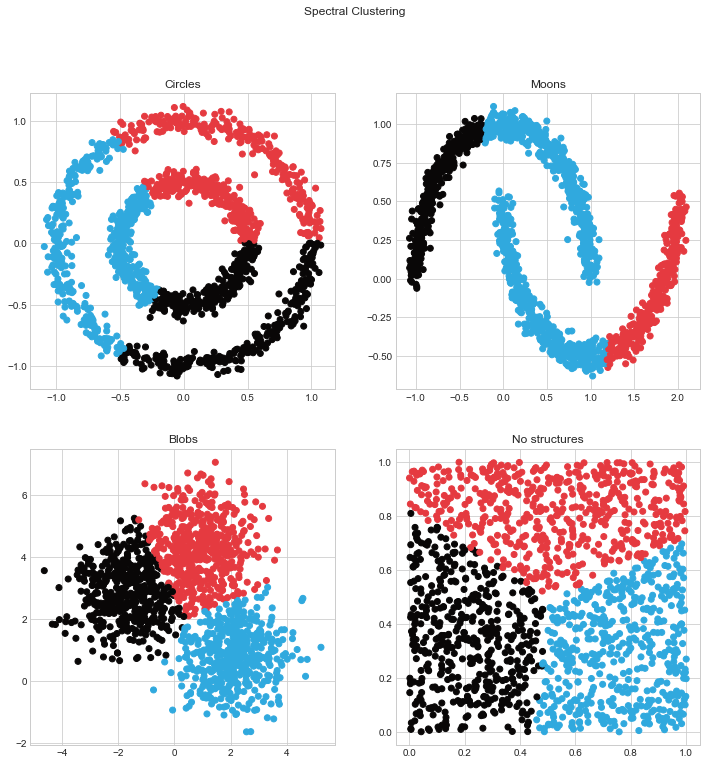

In [45]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Spectral Clustering')

fit_predict_plot(cluster.SpectralClustering(n_clusters=3, random_state=random_state),circles, 221, 'Circles') #k 값이 2이므로 데이터에서 클러스터를 2개 찾아야 함.
fit_predict_plot(cluster.SpectralClustering(n_clusters=3, random_state=random_state),moons, 222, 'Moons')
fit_predict_plot(cluster.SpectralClustering(n_clusters=3, random_state=random_state),blobs, 223, 'Blobs')
fit_predict_plot(cluster.SpectralClustering(n_clusters=3, random_state=random_state),no_structures, 224, 'No structures')

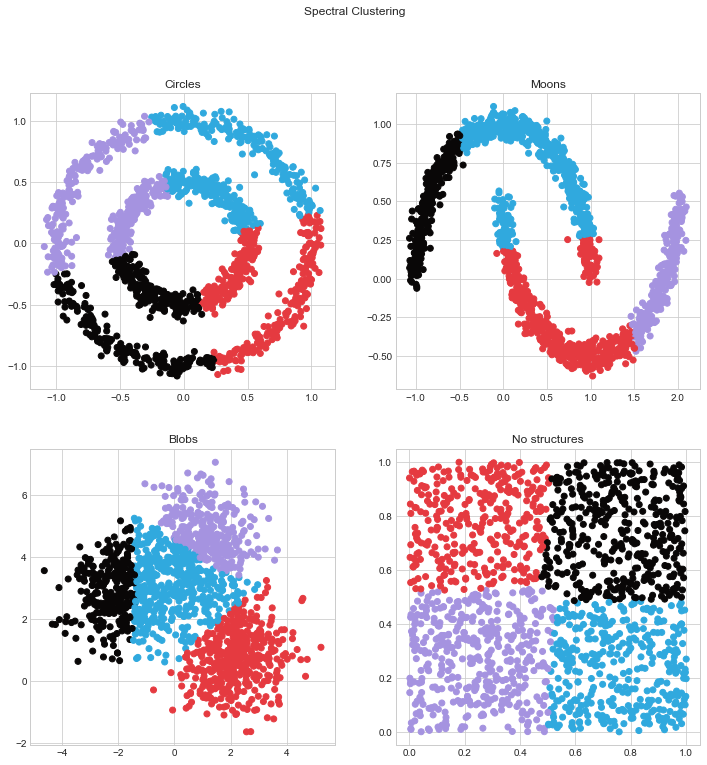

In [46]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Spectral Clustering')

fit_predict_plot(cluster.SpectralClustering(n_clusters=4, random_state=random_state),circles, 221, 'Circles') #k 값이 2이므로 데이터에서 클러스터를 2개 찾아야 함.
fit_predict_plot(cluster.SpectralClustering(n_clusters=4, random_state=random_state),moons, 222, 'Moons')
fit_predict_plot(cluster.SpectralClustering(n_clusters=4, random_state=random_state),blobs, 223, 'Blobs')
fit_predict_plot(cluster.SpectralClustering(n_clusters=4, random_state=random_state),no_structures, 224, 'No structures')

# 유방암 데이터 예제

In [47]:
from sklearn.datasets import load_breast_cancer

In [48]:
cancer = load_breast_cancer()

In [49]:
model = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity='nearest_neighbors')
model.fit(cancer.data)
predict=model.labels_

In [51]:
idx = np.where(predict==0)
print(cancer.target[idx])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0
 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1
 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0]


In [52]:
idx = np.where(predict==1)
print(cancer.target[idx])

[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]


# 계층 군집화

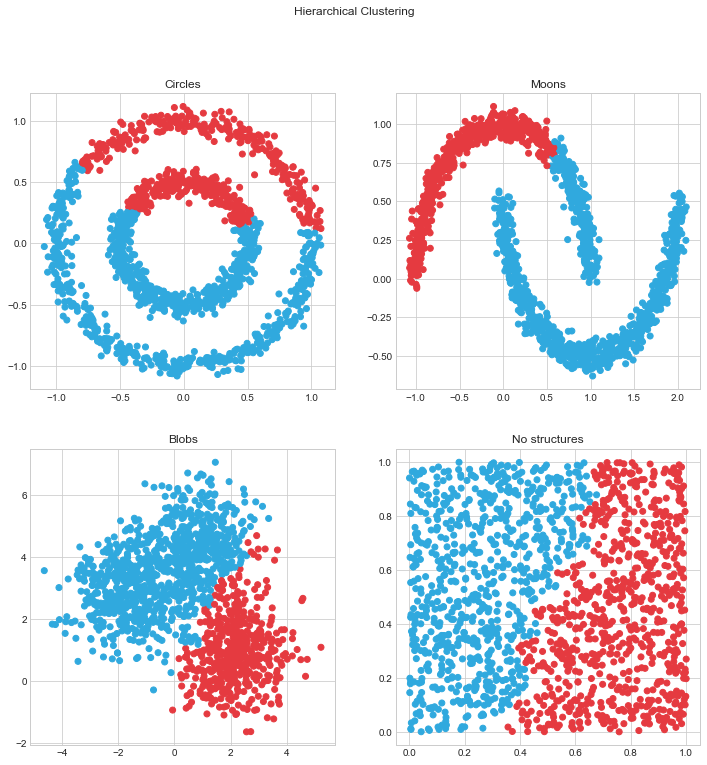

In [53]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Hierarchical Clustering')

fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage ='ward'),circles, 221, 'Circles')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage ='ward'),moons, 222, 'Moons')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage ='ward'),blobs, 223, 'Blobs')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage ='ward'),no_structures, 224, 'No structures')

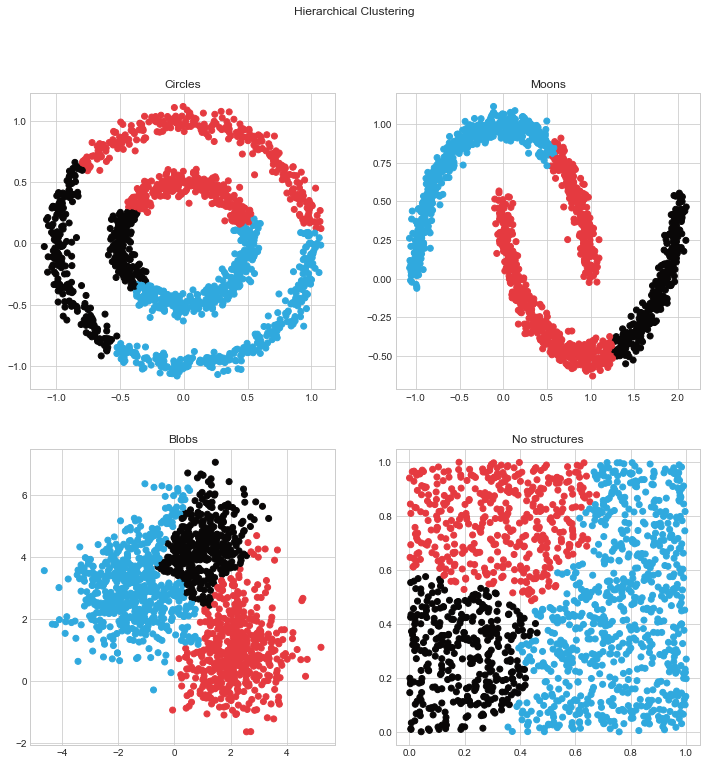

In [54]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Hierarchical Clustering')

fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3, linkage ='ward'),circles, 221, 'Circles')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3, linkage ='ward'),moons, 222, 'Moons')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3, linkage ='ward'),blobs, 223, 'Blobs')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3, linkage ='ward'),no_structures, 224, 'No structures')

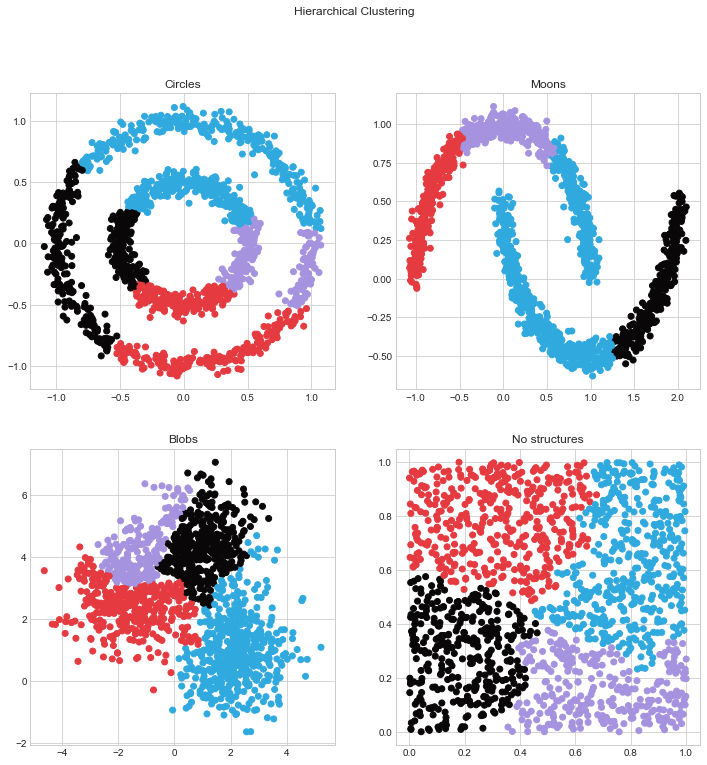

In [55]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Hierarchical Clustering')

fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=4, linkage ='ward'),circles, 221, 'Circles')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=4, linkage ='ward'),moons, 222, 'Moons')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=4, linkage ='ward'),blobs, 223, 'Blobs')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=4, linkage ='ward'),no_structures, 224, 'No structures')

# 와인 데이터 예제 군집화

In [56]:
from sklearn.datasets import load_wine

In [57]:
wine = load_wine()

In [58]:
model = cluster.AgglomerativeClustering(n_clusters=3)
model.fit(wine.data)
predict = model.labels_

In [63]:
idx = np.where(predict==0)
print(wine.target[idx])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1]


In [64]:
idx = np.where(predict==1)
print(wine.target[idx])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [65]:
idx = np.where(predict==2)
print(wine.target[idx])

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


# DBScan 디비스 캔
- 밀도 기반해서 많이 쓰임. 알아두는게 좋음

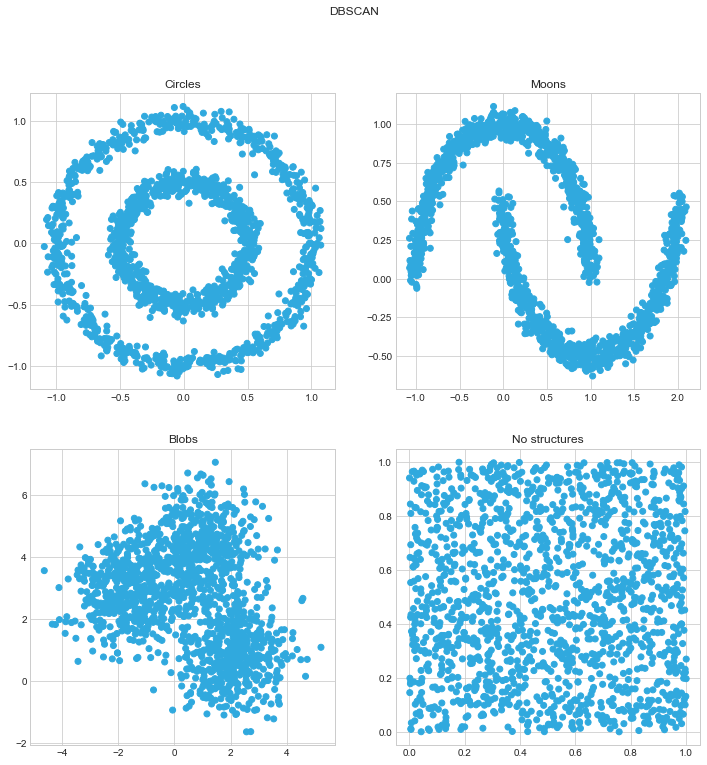

In [67]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('DBSCAN')

fit_predict_plot(cluster.DBSCAN(eps=3),circles, 221, 'Circles')
fit_predict_plot(cluster.DBSCAN(eps=3),moons, 222, 'Moons')
fit_predict_plot(cluster.DBSCAN(eps=3),blobs, 223, 'Blobs')
fit_predict_plot(cluster.DBSCAN(eps=3),no_structures, 224, 'No structures')

- 처음으로 반달모양 두개 다 구분함. 결과가 잘 나왔는데, 내거에는 잘 안나옴.

# OPTICS 옵틱스
#### 오더링 포인트로 해서 유일하게, 내부 원 구분했다

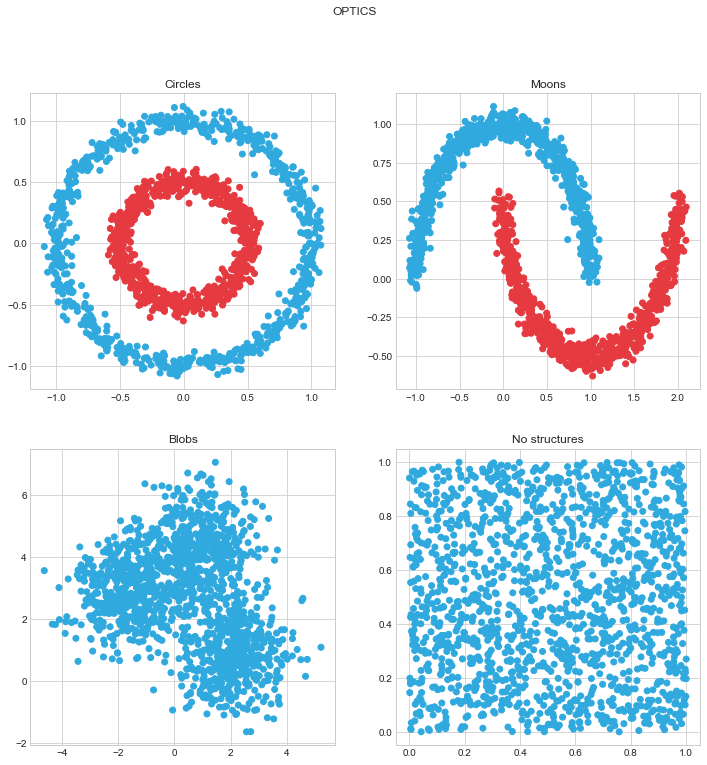

In [69]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('OPTICS')

fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1),circles, 221, 'Circles') # 최소 클러스터 사이즈를 0.1
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1),moons, 222, 'Moons')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1),blobs, 223, 'Blobs')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1),no_structures, 224, 'No structures')

- 오더링을 고려함. 그런데, 오더링 포인트 기반으로 밀집된 클러스터 스트럭쳐는 찾을 수 있는데, 아무런 구조 특성이 없는 3,4번은 찾을 수 없음.

# Birch 버츠

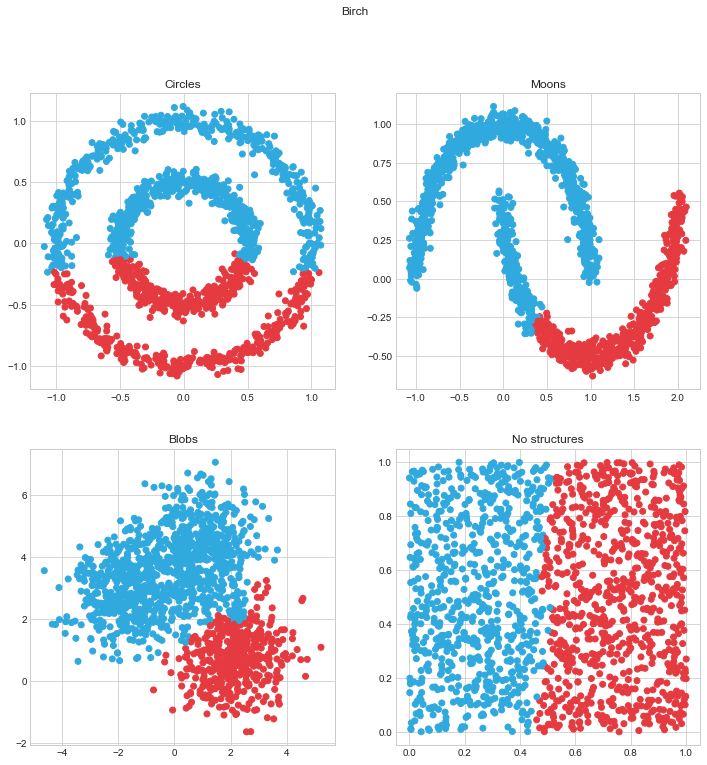

In [70]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Birch')

fit_predict_plot(cluster.Birch(n_clusters=2, threshold=0.3),circles, 221, 'Circles') # 최소 클러스터 사이즈를 0.1
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=0.3),moons, 222, 'Moons')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=0.3),blobs, 223, 'Blobs')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=0.3),no_structures, 224, 'No structures')

- 3번째를 잘한 것 같다.

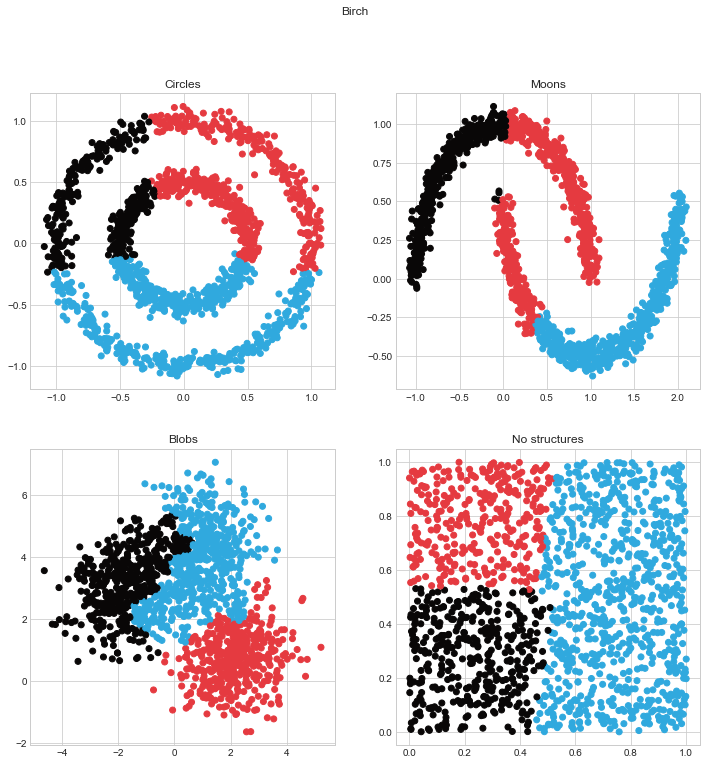

In [71]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Birch')

fit_predict_plot(cluster.Birch(n_clusters=3, threshold=0.3),circles, 221, 'Circles') # 최소 클러스터 사이즈를 0.1
fit_predict_plot(cluster.Birch(n_clusters=3, threshold=0.3),moons, 222, 'Moons')
fit_predict_plot(cluster.Birch(n_clusters=3, threshold=0.3),blobs, 223, 'Blobs')
fit_predict_plot(cluster.Birch(n_clusters=3, threshold=0.3),no_structures, 224, 'No structures')

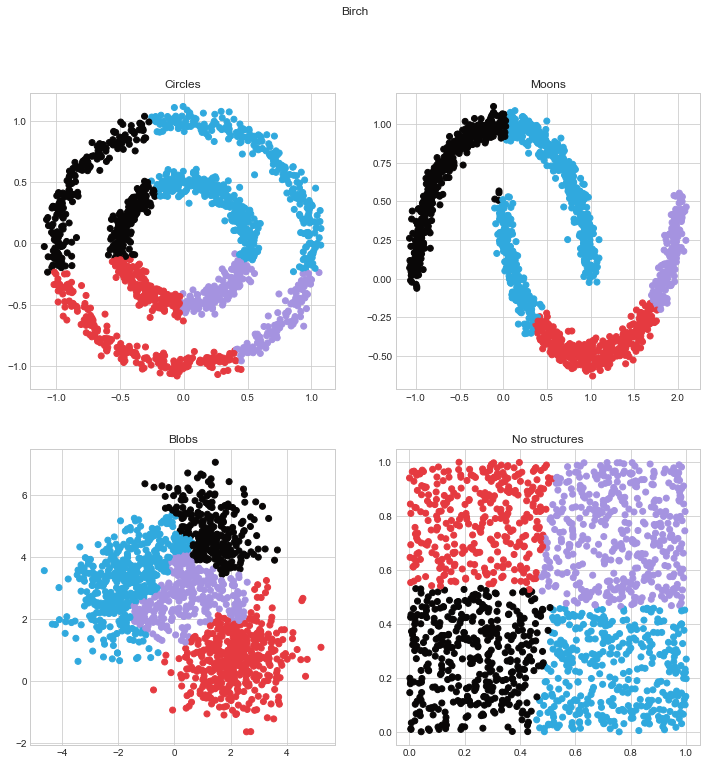

In [72]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Birch')

fit_predict_plot(cluster.Birch(n_clusters=4, threshold=0.3),circles, 221, 'Circles') # 최소 클러스터 사이즈를 0.1
fit_predict_plot(cluster.Birch(n_clusters=4, threshold=0.3),moons, 222, 'Moons')
fit_predict_plot(cluster.Birch(n_clusters=4, threshold=0.3),blobs, 223, 'Blobs')
fit_predict_plot(cluster.Birch(n_clusters=4, threshold=0.3),no_structures, 224, 'No structures')

- 클러스트 개수를 늘려도, 잘 알아채지 못함

# 손글씨 데이터 예제 군집화

In [73]:
from sklearn.datasets import load_digits

In [75]:
digits = load_digits()
print(digits.DESCR) #데이터 살펴보기

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

- 실제 손으로 쓴 글씨 데이터

In [77]:
digits.data #이미지가 아니라 숫자형태로 이루어져 있음

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [78]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [80]:
# 디짓 데이터에 리쉐잎을 해서 시각화로 나타내보기
X = digits.data.reshape(-1,8,8)
y=digits.target

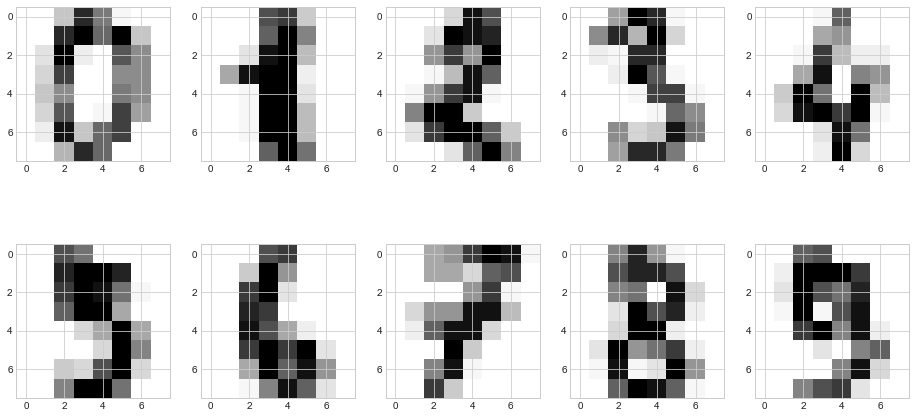

In [87]:
plt.figure(figsize=(16,8))
for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(X[i]) # 이미지쇼를 사용해서 배열을 잘 볼 수 있음.

# k means 를 활용해 손글씨 알아보기

In [88]:
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(digits.data)
predict = kmeans.predict(digits.data)

In [89]:
for i in range(10): #10개를 그리는데,
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    print('Cluster {} : {}'.format(i+1, real_class))

Cluster 1 : [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 1 8 6 6 6 6 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 8 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
Cluster 2 : [1 2 8 8 8 8 2 2 8 2 9 8 1 6 8 1 8 2 2 8 8 8 8 8 8 8 8 8 8 4 8 8 4 8 8 8 8
 8 1 1 8 1 8 8 8 1 1 1 1 1 1 1 8 1 1 8 8 8 6 2 8 8 8 8 8 9 8 8 8 8 1 8 8 8
 8 1 1 8 1 8 1 1 8 2 1 1 1 1 1 1 8 1 1 8 8 8 1 1 1 8 1 1 1 8 1 1 1 1 1 1 8
 8 1 1 8 1 8 1 1 8 1 1 1 1 1 1 8 1 1 8 8 8 8 1 8 1 1 1 1 1 1 1 1 8 1 8 8 8
 8 8 1 8 8 8 8 1 1 8 1 8 1 1 1 8 1 1 8 8 8 8 1 7 8 1 1 8 8 1 3 1 7 8 1 3 3
 4 1 8 1 1 4 1 1 8 1 1 8 1 1 3 8 1 8 8 1 1 8 1 3 3 3 1 8 1 1 1 1 8 1 1 8 8
 8 8]
Cluster 3 : [5 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 5 8 9 9 5 5 9 9 8 8 5 8 5
 8 8 8 9 9 8 9 9 5 5 9 8 9 8 8 3 3 3 9 5 9 9 8 9 8 9 9 8 9 8 3 

Cluster : 1


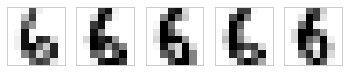

Cluster : 2


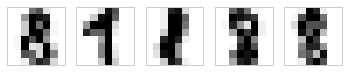

Cluster : 3


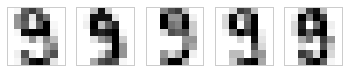

Cluster : 4


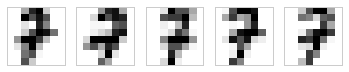

Cluster : 5


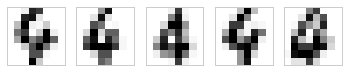

Cluster : 6


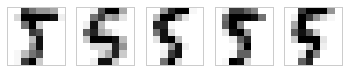

Cluster : 7


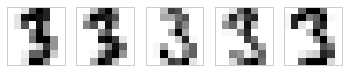

Cluster : 8


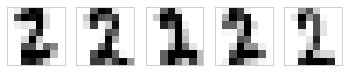

Cluster : 9


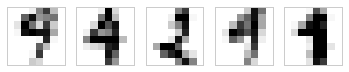

Cluster : 10


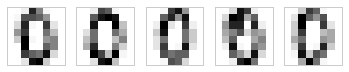

In [90]:
# 위를 결과로 보면 불편하니까 시각화로 보기
for i in range(10):
    idx = np.where(predict==i)[0]
    choice_idx = np.random.choice(idx, size=5)
    choice_image = X[choice_idx]

    k=1

    print('Cluster : {}'.format(i+1))
    for image in choice_image:
        plt.subplot(1,5,k)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)
        k+=1

    plt.show()

# 스텍트럴 클러스터로 손글씨 구분하기

In [91]:
spectral = cluster.SpectralClustering(n_clusters=10, eigen_solver='arpack', affinity='nearest_neighbors')
spectral.fit(digits.data)
predict = spectral.labels_

In [92]:
for i in range(10): #위에 처럼 먼저 텍스트로 구분해보기
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    print('Cluster {} : {}'.format(i+1, real_class))

Cluster 1 : [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
Cluster 2 : [3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 8 3 3 9 3 9 3
 9 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 8 3 3 9 8 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3
 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 8 9 9 3 9 3 9 3 5 9 9 9 9 3 5 3 3 3 3 9 9 3 3 3 9
 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9
 9 9 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3
 9 3 3 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 9 3
 3 3 3 3 9 9 3 9

Cluster : 1


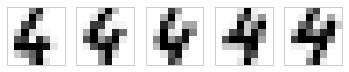

Cluster : 2


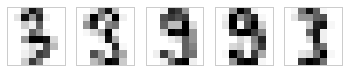

Cluster : 3


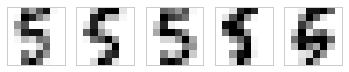

Cluster : 4


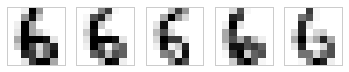

Cluster : 5


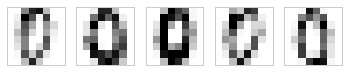

Cluster : 6


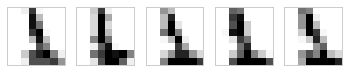

Cluster : 7


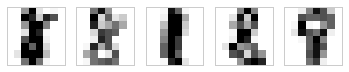

Cluster : 8


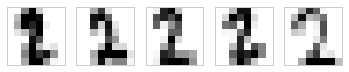

Cluster : 9


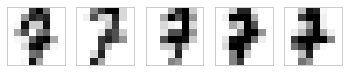

Cluster : 10


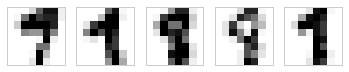

In [93]:
# 위를 결과로 보면 불편하니까 시각화로 보기
for i in range(10):
    idx = np.where(predict==i)[0]
    choice_idx = np.random.choice(idx, size=5)
    choice_image = X[choice_idx]

    k=1

    print('Cluster : {}'.format(i+1))
    for image in choice_image:
        plt.subplot(1,5,k)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)
        k+=1

    plt.show()

# 계층적 클러스터인 Hierarchical 클러스터로 손글씨 알아보기

In [94]:
hierarchical = cluster.AgglomerativeClustering(n_clusters=10, linkage='ward')
hierarchical.fit(digits.data)
predict = hierarchical.labels_

In [95]:
for i in range(10): #위에 처럼 먼저 텍스트로 구분해보기
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    print('Cluster {} : {}'.format(i+1, real_class))

Cluster 1 : [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 5 5]
Cluster 2 : [3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9
 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3 9 9 3
 3 3 9 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9
 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9
 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 9 3 3 9 9 8 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9
 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 9 3 3 3 3 3 9
 9 3 9 9

Cluster : 1


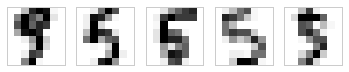

Cluster : 2


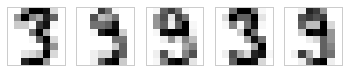

Cluster : 3


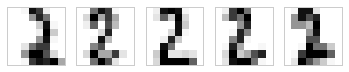

Cluster : 4


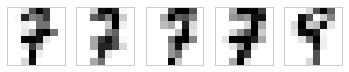

Cluster : 5


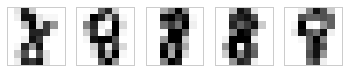

Cluster : 6


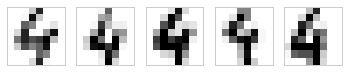

Cluster : 7


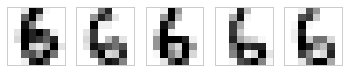

Cluster : 8


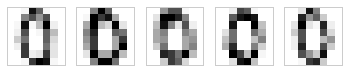

Cluster : 9


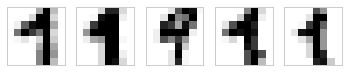

Cluster : 10


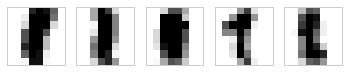

In [96]:
# 위를 결과로 보면 불편하니까 시각화로 보기
for i in range(10):
    idx = np.where(predict==i)[0]
    choice_idx = np.random.choice(idx, size=5)
    choice_image = X[choice_idx]

    k=1

    print('Cluster : {}'.format(i+1))
    for image in choice_image:
        plt.subplot(1,5,k)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)
        k+=1

    plt.show()

# Birch 로 손글씨 데이터 풀기

In [97]:
birch = cluster.Birch(n_clusters=10, threshold=0.3)
birch.fit(digits.data)
predict = birch.labels_

In [98]:
for i in range(10): #위에 처럼 먼저 텍스트로 구분해보기
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    print('Cluster {} : {}'.format(i+1, real_class))

Cluster 1 : [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 5 5]
Cluster 2 : [3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9
 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3 9 9 3
 3 3 9 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9
 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9
 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 9 3 3 9 9 8 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9
 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 9 3 3 3 3 3 9
 9 3 9 9

Cluster : 1


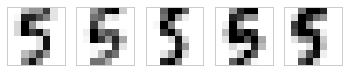

Cluster : 2


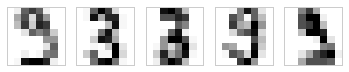

Cluster : 3


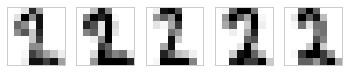

Cluster : 4


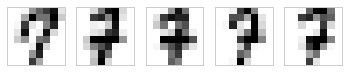

Cluster : 5


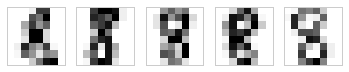

Cluster : 6


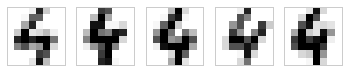

Cluster : 7


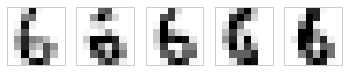

Cluster : 8


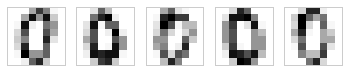

Cluster : 9


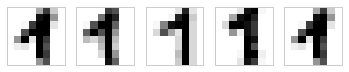

Cluster : 10


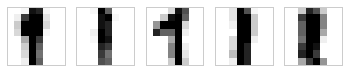

In [99]:
# 위를 결과로 보면 불편하니까 시각화로 보기
for i in range(10):
    idx = np.where(predict==i)[0]
    choice_idx = np.random.choice(idx, size=5)
    choice_image = X[choice_idx]

    k=1

    print('Cluster : {}'.format(i+1))
    for image in choice_image:
        plt.subplot(1,5,k)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)
        k+=1

    plt.show()